# User input

In [1]:
#start_year_past = 2021
#stop_year_past = 2040
#start_year_future = 2041
#stop_year_future = 2060

tuple_error_bar = ('pi',80)
name_project = 'WTP_Mutua_EIB'
name_city = 'Mutua'

# Import packages

In [2]:
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import gumbel_r
from scipy.stats import gumbel_l
import os
import os.path
import math
import seaborn as sns

from Functions_Indicators import add_year_month_season
from Functions_Indicators import filter_dataframe
from Functions_Indicators import find_name_col

#from Graphs_presentation_seaborn import trends_year

# Import data

## Temperature

In [3]:
out_path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz'
csv_path = os.path.join(out_path,'csv_file','tas','tas_Celsius_day_1950-2100','tas_1950-2100_projectsMoz.csv')
tas_clim_var = pd.read_csv(csv_path,header=[0],index_col=[0,1,2,3,4])

In [4]:
# list of project available in this dataframe
tas_clim_var.index.levels[0]

Index(['Chimoio_WTP_EIB', 'Gorongosa_EIB', 'Pemba_EIB', 'WTP_Mutua_EIB'], dtype='object', name='Name project')

In [5]:
list_model_to_kill = ['TaiESM1','CMCC-CM2-SR5'] # determinated by comparing observed data and modeled data.
# Modeled data with those models are not following the same trend as for observed data

In [6]:
tas_clim_var_filtered=filter_dataframe(tas_clim_var,name_project,list_model_to_kill)
tas_clim_var_filtered

,Name project,Experiment,Model,Latitude,Longitude,Date,Daily Near-Surface Air Temperature °C,Year,Month,Season
0,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,01-01-1950,30.038757,1950,Jan,Humid
1,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,02-01-1950,30.407043,1950,Jan,Humid
2,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,03-01-1950,30.592712,1950,Jan,Humid
3,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,04-01-1950,31.287659,1950,Jan,Humid
4,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,05-01-1950,25.517853,1950,Jan,Humid
...,...,...,...,...,...,...,...,...,...,...
2209359,WTP_Mutua_EIB,ssp370,NorESM2-MM,-19.375,34.625,27-12-2100,33.455231,2100,Dec,Humid
2209360,WTP_Mutua_EIB,ssp370,NorESM2-MM,-19.375,34.625,28-12-2100,33.220306,2100,Dec,Humid
2209361,WTP_Mutua_EIB,ssp370,NorESM2-MM,-19.375,34.625,29-12-2100,33.295776,2100,Dec,Humid
2209362,WTP_Mutua_EIB,ssp370,NorESM2-MM,-19.375,34.625,30-12-2100,33.413116,2100,Dec,Humid


We saw in another Python notebook that model 'TAIESM1' and 'CMCC-CM2-SR5' must be killed because do not follow the behaviour of temperature for the average temperature.

## Temperature maximum

In [7]:
out_path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz'
csv_path = os.path.join(out_path,'csv_file','tasmax','tasmax_Celsius_day_1950-2100','tasmax_1950-2100_projectsMoz.csv')
tasmax_clim_var = pd.read_csv(csv_path,header=[0],index_col=[0,1,2,3,4])

In [8]:
# we delete the models not working for temperature, also for tasmax
tasmax_clim_var_filtered=filter_dataframe(tasmax_clim_var,name_project,list_model_to_kill)

In [9]:
tasmax_clim_var_filtered

,Name project,Experiment,Model,Latitude,Longitude,Date,Daily Maximum Near-Surface Air Temperature °C,Year,Month,Season
0,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,01-01-1950,35.320282,1950,Jan,Humid
1,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,02-01-1950,36.137665,1950,Jan,Humid
2,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,03-01-1950,36.790802,1950,Jan,Humid
3,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,04-01-1950,38.028870,1950,Jan,Humid
4,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,05-01-1950,30.809021,1950,Jan,Humid
...,...,...,...,...,...,...,...,...,...,...
2059974,WTP_Mutua_EIB,ssp370,NorESM2-MM,-19.375,34.625,27-12-2100,39.643280,2100,Dec,Humid
2059975,WTP_Mutua_EIB,ssp370,NorESM2-MM,-19.375,34.625,28-12-2100,38.232727,2100,Dec,Humid
2059976,WTP_Mutua_EIB,ssp370,NorESM2-MM,-19.375,34.625,29-12-2100,38.471527,2100,Dec,Humid
2059977,WTP_Mutua_EIB,ssp370,NorESM2-MM,-19.375,34.625,30-12-2100,38.699799,2100,Dec,Humid


## Incremental air temperature change

In [10]:
#from Functions_Indicators import yearly_avg

In [11]:
def yearly_avg(df,title_column,climate_var_longName):
    df_yearly_avg = df.copy(deep =True)
    #df_yearly_avg=df_yearly_avg.drop(['Date','Month','Season'],axis=1)
    old_title_column=find_name_col(df,climate_var_longName)
    df_yearly_avg=df_yearly_avg.rename(columns={old_title_column:'Yearly average '+climate_var_longName})
    df_yearly_avg = df_yearly_avg.groupby(['Experiment','Model','Year'])[['Yearly average '+climate_var_longName]].mean() # .sum() for precipitaitonsum per year
    #df_yearly_avg = df_yearly_avg.groupby(['Name project','Experiment','Model']).mean()
    return df_yearly_avg

In [12]:
tas_yearly_avg=yearly_avg(tas_clim_var_filtered,'Daily Near-Surface Air Temperature °C','temperature')
tas_yearly_avg

Yearly average temperature
Experiment Model      Year                            
historical ACCESS-CM2 1950                   25.203555
                      1951                   24.747717
                      1952                   25.015565
                      1953                   24.473332
                      1954                   24.669184
...                                                ...
ssp585     NorESM2-MM 2096                   28.976463
                      2097                   30.096728
                      2098                   29.380016
                      2099                   29.806842
                      2100                   30.238027

[5317 rows x 1 columns]

In [13]:
tas_yearly_avg=tas_yearly_avg.reset_index()

Text(0.5, 1.0, 'Average yearly temperature °C, depending on scenario and\naccross models, between 1950 to 2100 at Mutua\ndata modeled with NEX-GDDP-CMIP6')

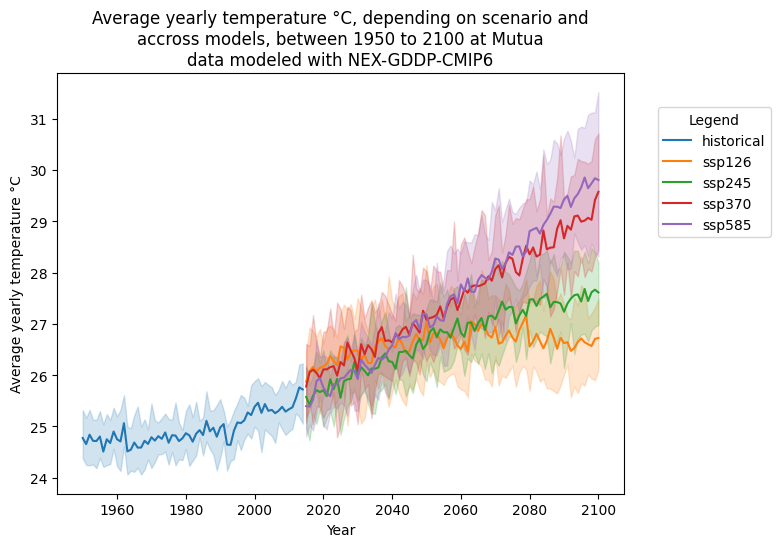

In [17]:
fig,ax=plt.subplots()
plt.tight_layout() # Adjust the padding between and around subplots.
sns.lineplot(tas_yearly_avg,x='Year',y='Yearly average temperature',hue='Experiment',errorbar=tuple_error_bar)
handles1, labels1=ax.get_legend_handles_labels() # register information from first y axis for the legend

fig.legend(handles1, labels1, loc='upper right', ncol=1, bbox_to_anchor=(1.2, 0.9),title='Legend')

ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line


plt.ylabel('Average yearly temperature °C')
plt.title('Average yearly temperature °C, depending on scenario and\naccross models, between 1950 to 2100 at '+name_city+'\ndata modeled with NEX-GDDP-CMIP6')

## number of days with temperatures above 40 degres

In [ ]:
def number_day_above_threshold(df,climate_var_longName,threshold):
    try:
        try:
            old_title_column=df.filter(like=climate_var_longName, axis=1).columns[0]
        except:
            old_title_column=df.filter(like=climate_var_longName.capitalize(), axis=1).columns[0]
    except:
        old_title_column=df.filter(like=climate_var_longName.upper(), axis=1).columns[0]
    new_name='Average annual number of days with '+climate_var_longName+' above '+str(threshold)
    #df = df.rename(columns={old_title_column:new_name})
    
    df = df.drop(['Date','Month','Season'],axis=1) 
    df=df.reset_index()
    #df=df.groupby(['Experiment','Model','Year']).apply(lambda x: x[x[new_name]>40].count()).reset_index()
    df[new_name]=0
    df[new_name].iloc[np.where(df[old_title_column]>40)[0]]=1    
    df = df.groupby(['Experiment','Model','Year'])[[new_name]].sum()
    
    return df

In [ ]:
max_tas_over_40 = number_day_above_threshold(tasmax_clim_var_filtered,'temperature',40)
max_tas_over_40 

In [ ]:
max_tas_over_40 = max_tas_over_40.reset_index()

In [ ]:
max_tas_over_40 = max_tas_over_40[max_tas_over_40['Model']!='TaiESM1']

In [ ]:
fig,ax = plt.subplots()
sns.lineplot(max_tas_over_40,x='Year',y='Average annual number of days with temperature above 40',hue='Model',errorbar=('pi',80))
plt.ylabel('Number of days with temperature above 40°C')
plt.title('Number of days with temperature above 40°C, depending on model,\n accross scenarios between 1950 to 2100 at '+name_city)
handles, labels=ax.get_legend_handles_labels()
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.3, 0.88),title='Legend')

In [ ]:
fig,ax = plt.subplots()
sns.lineplot(max_tas_over_40,x='Year',y='Average annual number of days with temperature above 40',hue='Experiment',errorbar=('pi',80))
#plt.ylim(0,100)
plt.ylabel('Number of days with maximum temperature above 40°C')
plt.title('Number of days with maximum temperature above 40°C, depending on\nscenario, accross model, between 1950 to 2100 at '+name_city+'\ndata modeled with NEX-GDDP-CMIP6')
handles, labels=ax.get_legend_handles_labels()
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')


In [ ]:
fig,ax = plt.subplots()
sns.lineplot(max_tas_over_40[(max_tas_over_40['Experiment']=='ssp370') | (max_tas_over_40['Experiment']=='historical')],x='Year',y='Average annual number of days with temperature above 40',hue='Experiment',errorbar=('pi',80))
plt.ylabel('Number of days with temperature above 40°C')
plt.title('Number of days with temperature above 40°C for ssp370,\n accross models, between 1950 to 2100 at '+name_city+'\ndata modeled with NEX-GDDP-CMIP6')
handles, labels=ax.get_legend_handles_labels()
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')

In [ ]:
max_tas_over_40_sorted=max_tas_over_40.sort_values('Average annual number of days with temperature above 40').reset_index(drop=True)
max_tas_over_40_sorted

In [ ]:
sns.lineplot(max_tas_over_40_sorted['Average annual number of days with temperature above 40'])

In [ ]:
max_tas_over_40.groupby(['Experiment','Model'])[['Average annual number of days with temperature above 40']].max()

In [ ]:
max_tas_over_40[max_tas_over_40['Model']=='ACCESS-CM2']

In [ ]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=5000, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    
    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = max_tas_over_40[max_tas_over_40['Model']=='ACCESS-CM2'].drop('Model',axis=1)#max_tas_over_40.groupby(['Experiment','Model'])[['Average annual number of days with temperature above 40']].max()#pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())
data = data[data['Experiment']=='ssp585'].set_index(['Experiment','Year'])
# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u'Data. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

In [ ]:
from scipy.stats import chi

In [ ]:
chi.ppf(0.9,0.37,0,0.04)

## Maximum temperature in year

In [ ]:
# mettre les max pour donnees

In [18]:
def max_per_year_for_each_model_ssp(df,climate_var_longName):
    try:
        try:
            old_title_column=df.filter(like=climate_var_longName, axis=1).columns[0]
        except:
            old_title_column=df.filter(like=climate_var_longName.capitalize(), axis=1).columns[0]
    except:
        old_title_column=df.filter(like=climate_var_longName.upper(), axis=1).columns[0]
    df = df.rename(columns={old_title_column:'Yearly maximum '+climate_var_longName})
    df = df.drop(['Date','Month','Season'],axis=1)
    df = df.groupby(['Experiment','Model','Year'])[['Yearly maximum '+climate_var_longName]].max()
    return df

In [19]:
df=max_per_year_for_each_model_ssp(tasmax_clim_var_filtered,'temperature')

In [23]:
df = df.reset_index()

In [20]:
# TEst pdf

  1 / 106: ksone
  2 / 106: kstwo
  3 / 106: kstwobign
  4 / 106: norm
  5 / 106: alpha
  6 / 106: anglit
  7 / 106: arcsine
  8 / 106: beta
  9 / 106: betaprime
 10 / 106: bradford
 11 / 106: burr
 12 / 106: burr12
 13 / 106: fisk
 14 / 106: cauchy
 15 / 106: chi
 16 / 106: chi2
 17 / 106: cosine
 18 / 106: dgamma
 19 / 106: dweibull
 20 / 106: expon
 21 / 106: exponnorm
 22 / 106: exponweib
 23 / 106: exponpow
 24 / 106: fatiguelife
 25 / 106: foldcauchy
 26 / 106: f
 27 / 106: foldnorm
 28 / 106: weibull_min
 29 / 106: truncweibull_min
 30 / 106: weibull_max
 31 / 106: genlogistic
 32 / 106: genpareto
 33 / 106: genexpon
 34 / 106: genextreme
 35 / 106: gamma
 36 / 106: erlang
 37 / 106: gengamma
 38 / 106: genhalflogistic
 39 / 106: genhyperbolic
 40 / 106: gompertz
 41 / 106: gumbel_r
 42 / 106: gumbel_l
 43 / 106: halfcauchy
 44 / 106: halflogistic
 45 / 106: halfnorm
 46 / 106: hypsecant
 47 / 106: gausshyper
 48 / 106: invgamma
 49 / 106: invgauss
 50 / 106: geninvgauss
 51 / 1

Text(0, 0.5, 'Frequency')

<Figure size 1200x800 with 0 Axes>

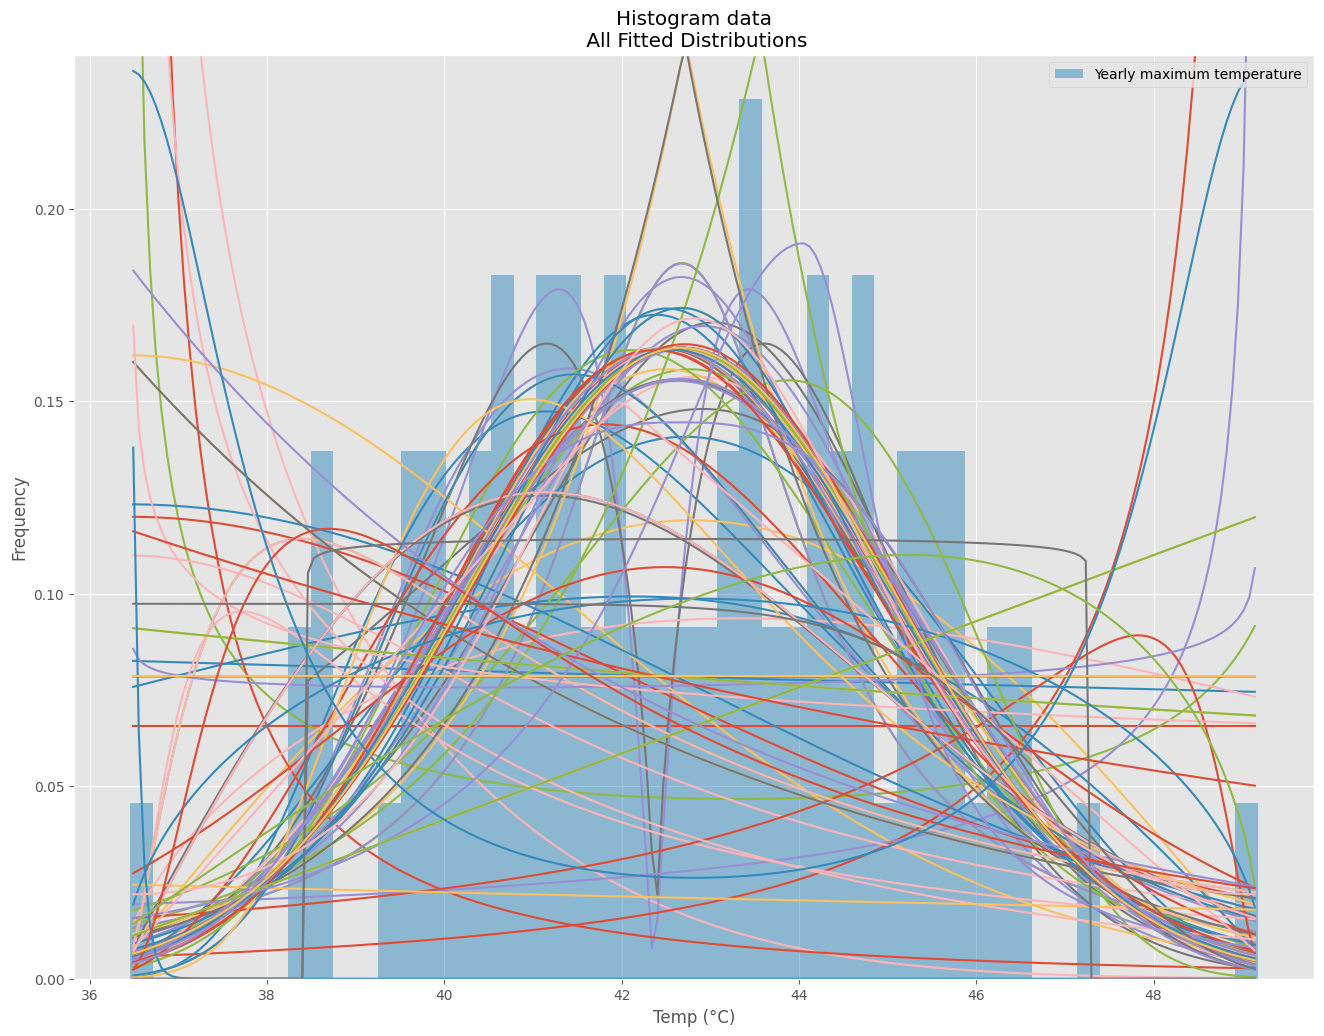

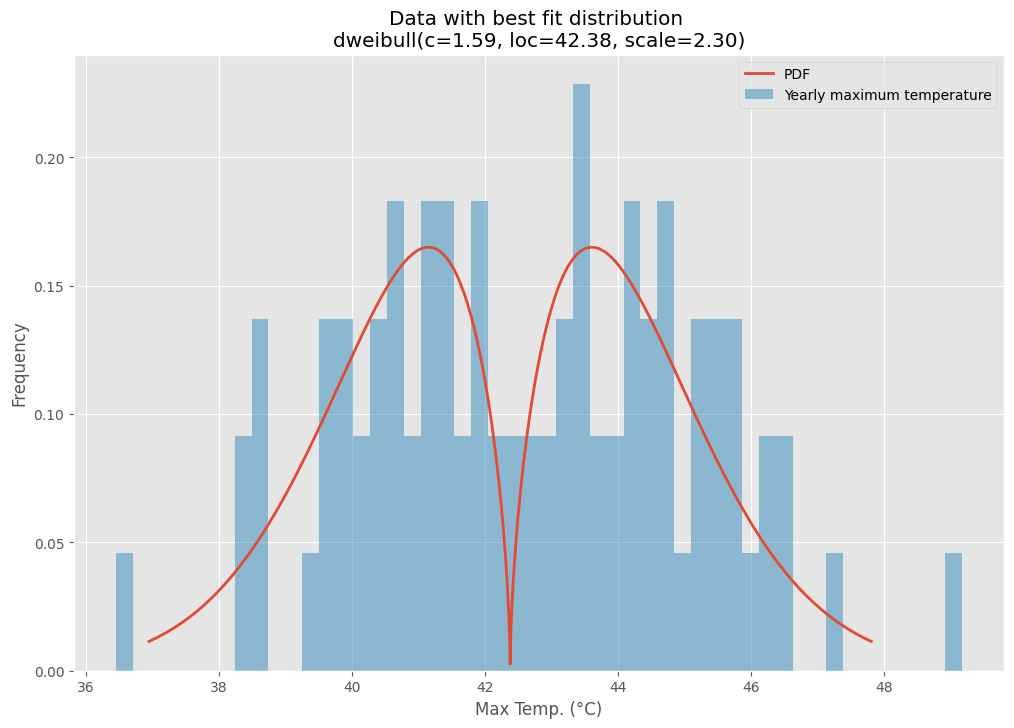

In [24]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=5000, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    
    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = df[df['Model']=='ACCESS-CM2'].drop('Model',axis=1)#df.set_index(['Experiment','Model','Year']).dropna()#[df['Model']=='ACCESS-CM2'].drop('Model',axis=1).set_index(['Experiment','Year'])#max_tas_over_40.groupby(['Experiment','Model'])[['Average annual number of days with temperature above 40']].max()#pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())
data = data[data['Experiment']=='ssp585'].set_index(['Year']).drop('Experiment',axis=1)

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Histogram data\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u'Data with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Max Temp. (°C)')
ax.set_ylabel('Frequency')

In [29]:
distribution_Name= best_dist[0].name

In [27]:
param_str

'c=1.59, loc=42.38, scale=2.30'

In [30]:
from scipy.stats import distribution_Name

ImportError: cannot import name 'distribution_Name' from 'scipy.stats' (C:\Users\CLMRX\AppData\Local\miniconda3\envs\geodata\lib\site-packages\scipy\stats\__init__.py)

In [ ]:
rice.ppf(0.05,1.8,loc=36.01,scale=2.61)

In [ ]:
rice.ppf(0.95,1.8,loc=36.01,scale=2.61)

In [ ]:
rice.pdf(45.512922702726385,1.8,loc=36.01,scale=2.61)

In [ ]:
rice.cdf(45.512922702726385,1.8,loc=36.01,scale=2.61)

In [ ]:
from scipy.stats import powernorm

In [ ]:
powernorm.ppf(0.05,0.15,loc=37.61,scale=1.14)

In [ ]:
powernorm.ppf(0.95,0.15,loc=37.61,scale=1.14)

In [ ]:
powernorm.cdf(44.30692720650443,0.15,loc=37.61,scale=1.14)

In [ ]:
powernorm.pdf(44.30692720650443,0.15,loc=37.61,scale=1.14)

In [ ]:
from scipy.stats import dweibull

In [ ]:
dweibull.ppf(0.05,1.59,loc=42.38,scale=2.30)

In [ ]:
dweibull.ppf(0.95,1.59,loc=42.38,scale=2.30)

In [ ]:
dweibull.cdf(46.26630109771236,1.59,loc=42.38,scale=2.30)

In [ ]:
dweibull.pdf(46.26630109771236,1.59,loc=42.38,scale=2.30)

In [ ]:
Methods
-------
rvs(b, loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, b, loc=0, scale=1)
    Probability density function.
logpdf(x, b, loc=0, scale=1)
    Log of the probability density function.
cdf(x, b, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, b, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, b, loc=0, scale=1)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
logsf(x, b, loc=0, scale=1)
    Log of the survival function.
ppf(q, b, loc=0, scale=1)
    Percent point function (inverse of ``cdf`` --- percentiles).

In [ ]:
df=df.reset_index()

In [ ]:
fig,ax = plt.subplots()
sns.lineplot(df,x='Year',y='Yearly maximum temperature',hue='Experiment',errorbar=('pi',80))# ajouter les donnes obs
plt.ylabel('Yearly maximum temperature °C')
plt.title('Yearly maximum temperature °C depending on scenario,\n accross models between 1950 to 2100 at Gorongosa, MZ\ndata modeled with NEX-GDDP-CMIP6')
handles, labels=ax.get_legend_handles_labels()
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')

In [ ]:
df = df.reset_index().drop('index',axis=1)
df

In [ ]:
tas_yearly_avg_historical = df[df['Experiment']=='historical'].sort_values('Yearly maximum temperature',na_position='first').dropna()
tas_yearly_avg_historical['CDF'] = np.arange(len(tas_yearly_avg_historical)) / float(len(tas_yearly_avg_historical))

tas_yearly_avg_ssp126 = tas_yearly_avg[tas_yearly_avg['Experiment']=='ssp126'].sort_values('Yearly average temperature',na_position='first').dropna()
tas_yearly_avg_ssp126['CDF'] = np.arange(len(tas_yearly_avg_ssp126)) / float(len(tas_yearly_avg_ssp126))

tas_yearly_avg_ssp245 = tas_yearly_avg[tas_yearly_avg['Experiment']=='ssp245'].sort_values('Yearly average temperature',na_position='first').dropna()
tas_yearly_avg_ssp245['CDF'] = np.arange(len(tas_yearly_avg_ssp245)) / float(len(tas_yearly_avg_ssp245))

tas_yearly_avg_ssp370 = tas_yearly_avg[tas_yearly_avg['Experiment']=='ssp370'].sort_values('Yearly average temperature',na_position='first').dropna()
tas_yearly_avg_ssp370['CDF'] = np.arange(len(tas_yearly_avg_ssp370)) / float(len(tas_yearly_avg_ssp370))

tas_yearly_avg_ssp585 = tas_yearly_avg[tas_yearly_avg['Experiment']=='ssp585'].sort_values('Yearly average temperature',na_position='first').dropna()
tas_yearly_avg_ssp585['CDF'] = np.arange(len(tas_yearly_avg_ssp585)) / float(len(tas_yearly_avg_ssp585))

df_lines = pd.concat([tas_yearly_avg_historical,tas_yearly_avg_ssp126,tas_yearly_avg_ssp245,tas_yearly_avg_ssp370,tas_yearly_avg_ssp585])

In [ ]:
df_lines = df_lines.reset_index().drop('index',axis=1)
df_lines['Period'] = df_lines['Year']

In [ ]:
df_lines.iloc[df_lines[df_lines['Year'].between(1980,2000)].index,5] = '1980-2000'

In [ ]:
df_lines_period = df_lines[df_lines['Year']>=1980]
df_lines_period = df_lines_period[df_lines_period['Year']<=2060]
df_lines_period_1 = df_lines_period[df_lines_period['Year']<=2000]
df_lines_period_2 = df_lines_period[df_lines_period['Year']>=2020]
#df_lines_period_future = df_lines[df_lines[df_lines['Year'].between(2020,2060)].index]
df_lines_period = pd.concat([df_lines_period_1,df_lines_period_2])

In [ ]:
g = sns.FacetGrid(df_lines_period, col="Period", height=3, aspect=.8)
g.map(sns.lineplot, "Yearly maximum temperature",'CDF','Experiment', palette=sns.color_palette('bright', n_colors=5)).add_legend(title='Legend')
g.fig.subplots_adjust(top=0.75) # adjust the Figure in rp
g.fig.suptitle('Cumulative distribution function of the yearly maximum temperature\nof the modeled data NEX-GDDP-CMIP6')
plt.show()

In [ ]:
trends_year('tas',df,'NEX-GDDP-CMIP6','mean','gorongosa',1960,2100)

In [ ]:
tas_yearly_max_historical = df[df['Experiment']=='historical'].sort_values('Yearly maximum temperature',na_position='first').dropna()
tas_yearly_max_historical['CDF'] = np.arange(len(tas_yearly_max_historical)) / float(len(tas_yearly_max_historical))

tas_yearly_max_ssp126 = df[df['Experiment']=='ssp126'].sort_values('Yearly maximum temperature',na_position='first').dropna()
tas_yearly_max_ssp126['CDF'] = np.arange(len(tas_yearly_max_ssp126)) / float(len(tas_yearly_max_ssp126))

tas_yearly_max_ssp245 = df[df['Experiment']=='ssp245'].sort_values('Yearly maximum temperature',na_position='first').dropna()
tas_yearly_max_ssp245['CDF'] = np.arange(len(tas_yearly_max_ssp245)) / float(len(tas_yearly_max_ssp245))

tas_yearly_max_ssp370 = df[df['Experiment']=='ssp370'].sort_values('Yearly maximum temperature',na_position='first').dropna()
tas_yearly_max_ssp370['CDF'] = np.arange(len(tas_yearly_max_ssp370)) / float(len(tas_yearly_max_ssp370))

tas_yearly_max_ssp585 = df[df['Experiment']=='ssp585'].sort_values('Yearly maximum temperature',na_position='first').dropna()
tas_yearly_max_ssp585['CDF'] = np.arange(len(tas_yearly_max_ssp585)) / float(len(tas_yearly_max_ssp585))

df_lines = pd.concat([tas_yearly_max_historical,tas_yearly_max_ssp126,tas_yearly_max_ssp245,tas_yearly_max_ssp370,tas_yearly_max_ssp585])

In [ ]:
tas_yearly_max_ssp585 = df[df['Experiment']=='ssp585'].sort_values('Yearly maximum temperature',na_position='first').dropna()

In [ ]:
tas_yearly_max_ssp585

In [ ]:
fig,ax=plt.subplots()
sns.lineplot(data=df_lines,x='Yearly maximum temperature',y='CDF',hue='Experiment',errorbar =('pi',80))
handles, labels=ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
plt.ylabel('Cumulative distribution function')
plt.title('Cumulative distribution function of the yearly maximum temperature,\ndepending on scenario and accross models, between 1950 to 2100 at\nMutua, MZ, data modeled with NEX-GDDP-CMIP6')